In [240]:
import pandas as pd
import geopandas as gpd
import requests
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Covid Data


In [247]:
covid_data_url = "../data/external/COVID-19 UK Cases.xlsx"
covid_df = pd.read_excel(covid_data_url, sheet_name="L4-LTLA",
                        usecols="B:AJ").dropna(subset=['Population (ONS estimates mid-2018)'])
covid_df.columns = covid_df.columns.astype(str)
covid_df.head()

,Number of confirmed COVID-19 cases (cumulative total) by date of test results,UTLA Code,England Upper Tier Local Authorities/ Scotland NHS Health Boards/\nWales Health Boards,LTLA Code,LTLA Name,Population (ONS estimates mid-2018),2020-05-07 00:00:00,2020-05-08 00:00:00,2020-05-09 00:00:00,2020-05-10 00:00:00,...,2020-05-26 00:00:00,2020-05-27 00:00:00,2020-05-28 00:00:00,2020-05-29 00:00:00,2020-05-30 00:00:00,2020-05-31 00:00:00,2020-06-01 00:00:00,2020-06-02 00:00:00,2020-06-03 00:00:00,2020-06-04 00:00:00
0,London,E09000002,Barking and Dagenham,E09000002,Barking and Dagenham,211998.0,466.0,469.0,473.0,476.0,...,496.0,496.0,496.0,498.0,498.0,497.0,497.0,497.0,497.0,499.0
1,London,E09000003,Barnet,E09000003,Barnet,392140.0,1235.0,1241.0,1245.0,1250.0,...,1285.0,1287.0,1288.0,1289.0,1291.0,1296.0,1298.0,1299.0,1299.0,1299.0
2,London,E09000004,Bexley,E09000004,Bexley,247258.0,653.0,661.0,664.0,666.0,...,713.0,714.0,714.0,716.0,717.0,717.0,720.0,724.0,727.0,727.0
3,London,E09000005,Brent,E09000005,Brent,330795.0,1392.0,1394.0,1405.0,1408.0,...,1467.0,1470.0,1470.0,1471.0,1471.0,1472.0,1471.0,1476.0,1478.0,1477.0
4,London,E09000006,Bromley,E09000006,Bromley,331096.0,1132.0,1144.0,1157.0,1165.0,...,1273.0,1274.0,1275.0,1275.0,1278.0,1278.0,1279.0,1280.0,1281.0,1282.0


# Ethnicity
`csv` is stacked so need to use [pivot](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)
Has results in terms of national population (i.e. total number of that ethnicity in the country) vs. the local share of population of that ethnicity. Using local share

In [250]:
url = "../data/external/ethnic-population-by-local-authority.csv"
race_df_raw = pd.read_csv(url)
drop = "% of national ethnic population in this LA area" 
race_df_raw = race_df_raw[race_df_raw.Measure != drop] #drop rows with national comparisons

race_df_raw.set_index(["Geography_name", "Ethnicity"]).sort_index() # sense check of the data

Measure  \
Geography_name Ethnicity                                                                    
Adur           Arab                            % of local population in this ethnic group   
               Asian                           % of local population in this ethnic group   
               Asian Other                     % of local population in this ethnic group   
               Bangladeshi                     % of local population in this ethnic group   
               Black                           % of local population in this ethnic group   
...                                                                                   ...   
York           White                           % of local population in this ethnic group   
               White British                   % of local population in this ethnic group   
               White Gypsy or Irish Traveller  % of local population in this ethnic group   
               White Irish                     % of local population in this ethnic group   
               White Other                     % of local population in this ethnic group   

                                               Time Ethnicity_type  \
Geography_name Ethnicity                                             
Adur           Arab                            2011  ONS 2011 18+1   
               Asian                           2011   ONS 2011 5+1   
               Asian Other                     2011  ONS 2011 18+1   
               Bangladeshi                     2011  ONS 2011 18+1   
               Black                           2011   ONS 2011 5+1   
...                                             ...            ...   
York           White                           2011   ONS 2011 5+1   
               White British                   2011  ONS 2011 18+1   
               White Gypsy or Irish Traveller  2011  ONS 2011 18+1   
               White Irish                     2011  ONS 2011 18+1   
               White Other                     2011  ONS 2011 18+1   

                                              Geography_code   Geography_type  \
Geography_name Ethnicity                                                        
Adur           Arab                                E07000223  Local Authority   
               Asian                               E07000223  Local Authority   
               Asian Other                         E07000223  Local Authority   
               Bangladeshi                         E07000223  Local Authority   
               Black                               E07000223  Local Authority   
...                                                      ...              ...   
York           White                               E06000014  Local Authority   
               White British                       E06000014  Local Authority   
               White Gypsy or Irish Traveller      E06000014  Local Authority   
               White Irish                         E06000014  Local Authority   
               White Other                         E06000014  Local Authority   

                                               Value  Numerator  Denominator  
Geography_name Ethnicity                                                      
Adur           Arab                             0.28        170        61182  
               Asian                            1.73       1058        61182  
               Asian Other                      0.42        258        61182  
               Bangladeshi                      0.44        269        61182  
               Black                            0.51        313        61182  
...                                              ...        ...          ...  
York           White                           94.28     186731       198051  
               White British                   90.19     178613       198051  
               White Gypsy or Irish Traveller   0.14        269       198051  
               White Irish            

In [251]:
race_df = pd.pivot_table(race_df_raw,
               index=["Geography_code","Geography_name", "Denominator"], 
               columns ="Ethnicity", 
               values = "Value").reset_index()
race_df.head()

Ethnicity,Geography_code,Geography_name,Denominator,Arab,Asian,Asian Other,Bangladeshi,Black,Black African,Black Caribbean,...,Mixed White and Black African,Mixed White and Black Caribbean,Other,Other ethnic group,Pakistani,White,White British,White Gypsy or Irish Traveller,White Irish,White Other
0,E06000001,Hartlepool,92028,0.06,1.42,0.33,0.23,0.18,0.14,0.04,...,0.06,0.20,0.11,0.05,0.32,97.69,96.63,0.04,0.21,0.81
1,E06000002,Middlesbrough,138412,0.69,7.78,0.96,0.18,1.25,1.06,0.07,...,0.33,0.39,1.08,0.39,4.92,88.18,86.05,0.06,0.41,1.65
2,E06000003,Redcar and Cleveland,135177,0.03,0.64,0.17,0.07,0.09,0.06,0.03,...,0.08,0.22,0.10,0.07,0.22,98.54,97.60,0.06,0.31,0.57
3,E06000004,Stockton-on-Tees,191610,0.12,3.46,0.56,0.07,0.59,0.49,0.04,...,0.16,0.22,0.29,0.16,1.60,94.62,93.40,0.07,0.28,0.86
4,E06000005,Darlington,105564,0.11,2.09,0.44,0.50,0.34,0.20,0.10,...,0.09,0.44,0.25,0.14,0.14,96.24,93.69,0.33,0.31,1.91


# Joining race and covid deaths



In [252]:
covid_df_merge = covid_df.set_index("LTLA Name")
race_df_merge = race_df.set_index("Geography_name")


covid = set(covid_df["LTLA Name"].unique())
race = set(race_df["Geography_name"].unique())

df = covid_df_merge.join(race_df_merge)

In [253]:
df[list(df.columns[33:])]

,2020-06-04 00:00:00,Geography_code,Denominator,Arab,Asian,Asian Other,Bangladeshi,Black,Black African,Black Caribbean,...,Mixed White and Black African,Mixed White and Black Caribbean,Other,Other ethnic group,Pakistani,White,White British,White Gypsy or Irish Traveller,White Irish,White Other
LTLA Name,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,499.0,E09000002,185911.0,0.52,15.92,2.76,4.14,19.98,15.43,2.81,...,1.14,1.44,1.57,1.04,4.31,58.30,49.46,0.10,0.93,7.81
Barnet,1299.0,E09000003,356386.0,1.46,18.50,6.22,0.62,7.70,5.44,1.25,...,0.87,0.87,4.86,3.40,1.50,64.13,45.49,0.04,2.44,16.16
Bexley,727.0,E09000004,231997.0,0.13,6.57,1.80,0.33,8.46,6.88,1.03,...,0.42,0.72,0.76,0.63,0.31,81.88,77.26,0.27,1.12,3.23
Brent,1477.0,E09000005,311215.0,3.67,34.06,9.19,0.56,18.84,7.84,7.62,...,0.91,1.38,5.77,2.09,4.62,36.27,17.96,0.10,3.96,14.25
Bromley,1282.0,E09000006,309392.0,0.28,5.19,1.55,0.41,6.04,3.17,2.14,...,0.43,1.26,0.93,0.65,0.33,84.32,77.40,0.19,1.44,5.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ceredigion,42.0,W06000008,75922.0,0.26,1.45,0.31,0.12,0.35,0.22,0.11,...,0.10,0.26,0.50,0.24,0.11,96.73,93.14,0.10,0.63,2.86
Pembrokeshire,279.0,W06000009,122439.0,0.05,0.97,0.39,0.08,0.15,0.08,0.04,...,0.06,0.19,0.17,0.12,0.06,98.11,95.63,0.37,0.68,1.42
Powys,287.0,W06000023,132976.0,0.02,0.86,0.56,0.05,0.10,0.03,0.05,...,0.06,0.16,0.09,0.07,0.01,98.38,96.09,0.10,0.38,1.82


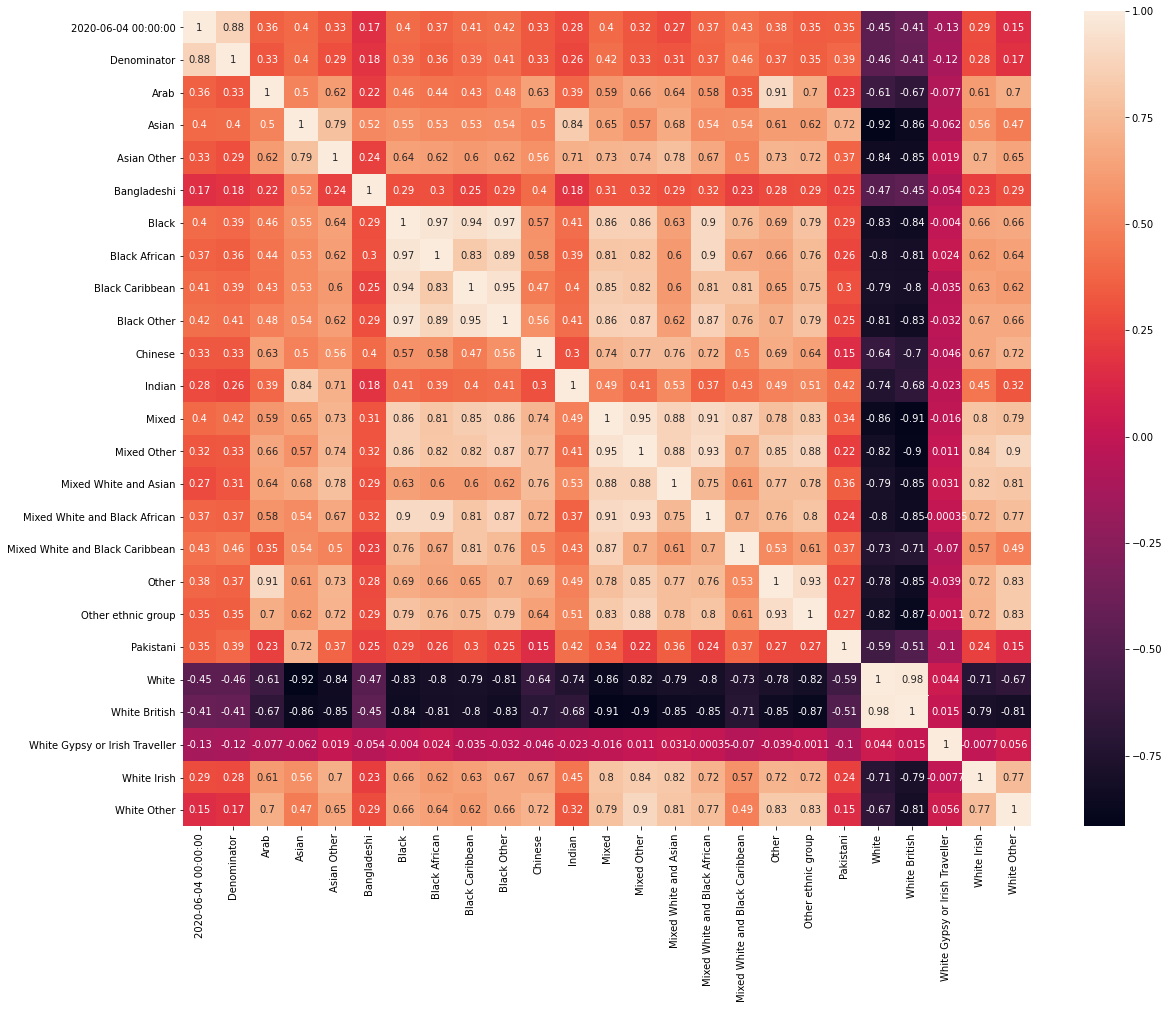

<Figure size 432x288 with 0 Axes>

In [274]:
#correlation matrix of relevant variables
plt.figure(figsize=(19, 15))
corrMatrix = df[list(df.columns[33:])].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
plt.savefig("../reports/figures/corrmat.png")

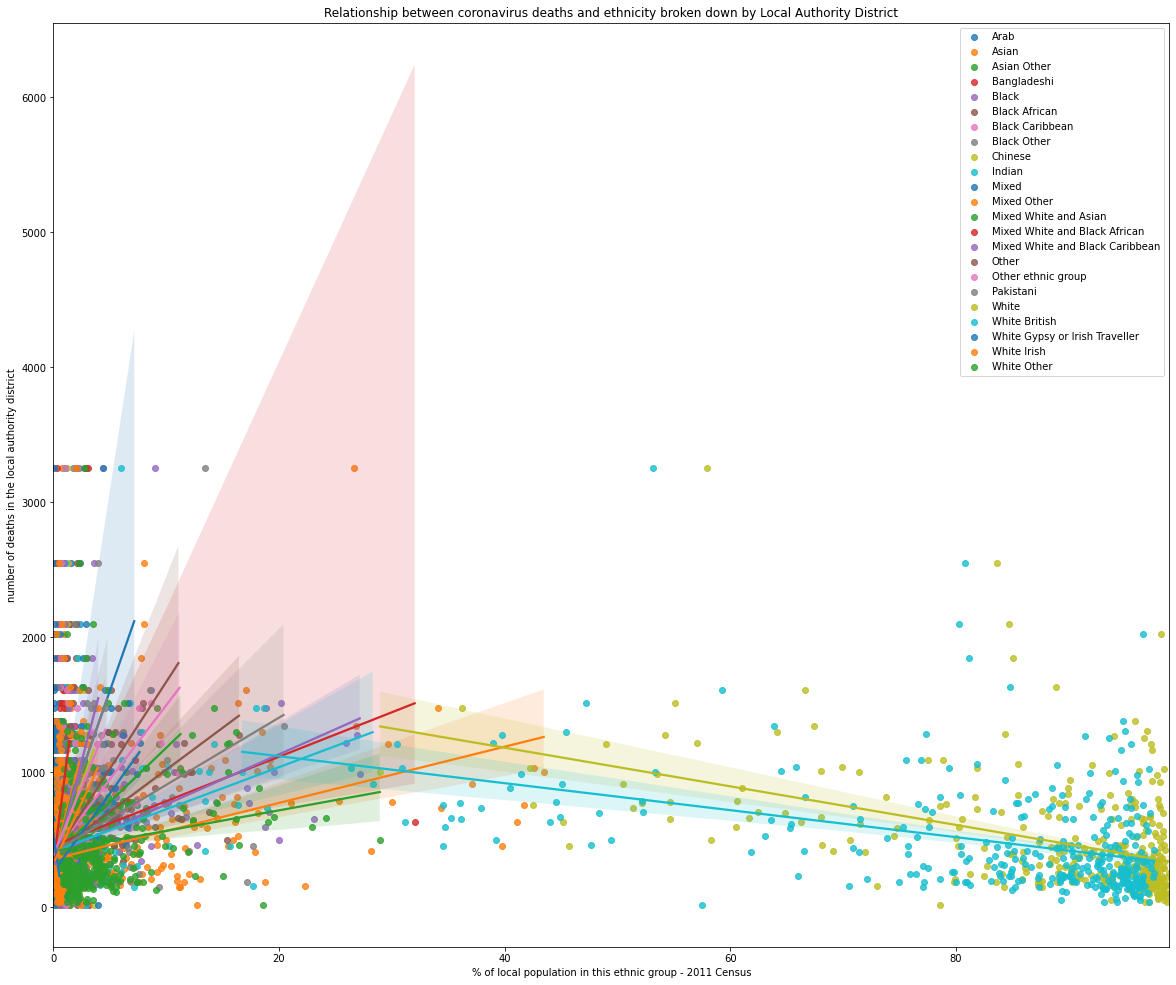

In [275]:
fig, ax = plt.subplots(figsize=(20,17))

corr_capture = {}
for i in race_df_merge.columns[2:]: #itterate throught the ethnicities
    correlation = df[covid_df.columns[-1]].corr(df[i])
    corr_capture[i] = correlation
    
    ax = sns.regplot(x=i, y=covid_df.columns[-1], data=df, label=i)
    
ax.legend()
plt.legend(loc='upper right')
ax.set_title('Relationship between coronavirus deaths and ethnicity broken down by Local Authority District')
ax.set_xlabel('% of local population in this ethnic group - 2011 Census')
ax.set_ylabel('number of deaths in the local authority district')

plt.savefig("../reports/figures/regplot.png")

In [205]:
corr_capture

{'Arab': 0.35994410789573505,
 'Asian': 0.39693650314411744,
 'Asian Other': 0.32705701454571656,
 'Bangladeshi': 0.16704214930148664,
 'Black': 0.4037170260240842,
 'Black African': 0.36609066488919595,
 'Black Caribbean': 0.4058565605705353,
 'Black Other': 0.4193069442312207,
 'Chinese': 0.32893302258191537,
 'Indian': 0.27638564729342646,
 'Mixed': 0.3963305477510563,
 'Mixed Other': 0.3239020362078226,
 'Mixed White and Asian': 0.27491688845037265,
 'Mixed White and Black African': 0.3722379423586808,
 'Mixed White and Black Caribbean': 0.4269065825615713,
 'Other': 0.38368374688937795,
 'Other ethnic group': 0.3485860717266053,
 'Pakistani': 0.35058927724109923,
 'White': -0.45456250067221227,
 'White British': -0.4051097965831478,
 'White Gypsy or Irish Traveller': -0.13004685967173013,
 'White Irish': 0.2869986260216559,
 'White Other': 0.1530292419558356}

# Shape

In [67]:
geojson_path = "../data/geog/Local_Authority_Districts__December_2009__Boundaries.geojson"
if os.path.exists(geojson_path):
    print("Reading geoJSON locally")
    gdf1 = gpd.read_file(geojson_path)
else:
    print("Unable to locate geoJSON, downloading now. This may take a while")
    r = requests.get("https://opendata.arcgis.com/datasets/5e14c6bedc8740d19683517e5e902057_3.geojson")
    gdf = gpd.read_file(f.json())

Reading geoJSON locally


In [86]:
general = set(gdf1.lad09nm.unique())

In [87]:
detail = set(gdf.lad16nm.unique())

In [88]:
name = "England Upper Tier Local Authorities/ Scotland NHS Health Boards/\nWales Health Boards"
target = set(covid_df[name].unique())